In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

### numpy version 확인

아래 줄을 실행해보시고 버전이 1.10보다 낮으면 terminal에서 "sudo pip install --upgrade numpy"로 업그레이드를 해야 아래 예제를 실행할 수 있다.

In [ ]:
print(np.version.version)

### Sample mean과 Sample covariance의 계산

정규분포(Normal distribution)에서 무작위(Random)로 얻은 표본(Sample)의 통계적 특성은 정말 정규분포의 평균(mean), 공분산(Covariance)와 일치할까?

이번 실험에서는 평균과 공분산을 정한 정규분포에서 표본들을 얻고 이들의 Sample mean, Sample covariance matrix를 구해서 실험에서 구한 값과 비슷한 값을 보여주는지 확인하려고 한다.

#### Sample mean vector
- $\bar{\mathbf{x}} = \frac{\sum_{i=1}^{N}{\mathbf{x}_i}}{N}$ 

numpy.mean 함수를 이용하여 바로 계산할 수 있다.
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html

In [3]:
def sample_mean(Xt):
    return np.mean(Xt, axis=0)

In [4]:
def sample_mean_with_sum(Xt):
    N = Xt.shape[0]
    return np.sum(Xt, axis=0)/N

#### Sample covariance matrix
- $\bar{\mathbf{\Sigma}} = \frac{\sum_{i=1}^{N}{ (\mathbf{x_i} - \bar{\mathbf{x}}) (\mathbf{x_i} - \bar{\mathbf{x}})^T}}{N-1}$ 

 - Q: 왜 $(N-1)$로 나눠주는지?

 - A: $(N-1)$로 나누어야 Sample covariance matrix의 평균이 Covariance matrix가 된다. (Unbiased estimator)
 - 증명 https://mycourses.aalto.fi/pluginfile.php/364838/mod_resource/content/1/Proof%20that%20Sample%20Variance%20is%20Unbiased.pdf

In [5]:
def sample_covariance(Xt):
    # x.shape is a tuple with (the number of samples(N), feature dimension(D))
    N = Xt.shape[0] 
    mu = sample_mean(Xt)           # [1 x D]
    Xt_mu = (Xt - mu)                 # [N x D] - [1 x D] = [N x D] 
                                  # broadcasting occurs at subtraction
    X_mu  = np.transpose(Xt_mu)         # [D x N]
    return np.matmul(X_mu, Xt_mu)/(N-1) # [D x N] * [N x D] = [D x D]

수식의 경우 single vector 별로 covariance matrix를 구하고($(\mathbf{x_i} - \bar{\mathbf{x}}) (\mathbf{x_i} - \bar{\mathbf{x}})^T$), 전체를 더하는 식으로 $\sum_{i=1}^{N}$ 계산을 하도록 되어 있는데, Column vector가 아니라 Sample이 한꺼번에 있는 행렬을 사용하면, 행렬 곱으로 전체를 더하는 연산까지 한번에 진행이 가능하다.

위에서 np.matmul(X, Xt)의 연산은 X*Xt의 행렬곱 연산인데, 이렇게 해야 Sample covariance matrix의 정의에 맞는 결과가 나온다.


In [7]:
N_repeat = 10
N_samples = 10000
mu1 = np.array([0.0, 0.0])
mu2 = np.array([20.0, 30.0, 40.0])
mu3 = np.array([40.0, 0.0, 10.0, 5.0])

cov1 = np.array([[1,0],[0,1]])
cov2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
cov3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

# compute the mean of 'sample mean' and 'sample variance'
g1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=N_samples)
g2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=N_samples)
g3 = np.random.multivariate_normal(mean=mu3, cov=cov3,size=N_samples)

print('g1 mean / sample mean')
print(mu1, sample_mean(g1))
print('g1 cov')
print(cov1)
print('g1 sample cov')
print(sample_covariance(g1))

print('g2')
print(mu2, sample_mean(g2))
print('g2 cov')
print(cov2)
print('g2 sample cov')
print(sample_covariance(g2))

print('g3')
print(mu3, sample_mean(g3))
print('g3 cov')
print(cov3)
print('g3 sample cov')
print(sample_covariance(g3))

g1 mean / sample mean
(array([ 0.,  0.]), array([ 0.00470477,  0.00058405]))
g1 cov
[[1 0]
 [0 1]]
g1 sample cov
[[ 0.98701312  0.00628393]
 [ 0.00628393  1.00382639]]
g2
(array([ 20.,  30.,  40.]), array([ 20.01541627,  30.00214416,  39.98634799]))
g2 cov
[[1 0 0]
 [0 1 0]
 [0 0 1]]
g2 sample cov
[[ 1.00049363 -0.00291243  0.00408668]
 [-0.00291243  0.99431068 -0.00886154]
 [ 0.00408668 -0.00886154  0.99713701]]
g3
(array([ 40.,   0.,  10.,   5.]), array([  4.00079138e+01,   7.55784068e-03,   1.00016585e+01,
         4.98605767e+00]))
g3 cov
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
g3 sample cov
[[  9.68138746e-01  -1.04364031e-02  -5.10400237e-03  -5.75173391e-04]
 [ -1.04364031e-02   1.01523822e+00  -8.33118787e-04   4.19761470e-03]
 [ -5.10400237e-03  -8.33118787e-04   1.00120756e+00  -5.15216930e-03]
 [ -5.75173391e-04   4.19761470e-03  -5.15216930e-03   9.87833053e-01]]


### 정규 분포의 확률 밀도 함수 (Probability density function for Normal distribution)

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \frac{1}{2\pi \sqrt{det|\Sigma|}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix} \right)$

#### 라이브러리의 확률 분포 함수를 사용하면 간단하게 시각화가 가능하다. 

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


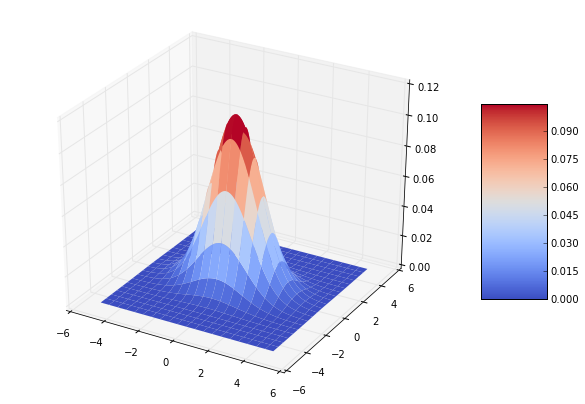

In [8]:
from scipy.stats import multivariate_normal

minVal   = -5
maxVal   = 5
stepSize = 0.05
xAxisVal = np.arange(minVal, maxVal, stepSize)
yAxisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(xAxisVal, yAxisVal)

cov = np.array([[2, 0], [0, 1]]) # Identity matrix
mu = np.array([0,0])
var = multivariate_normal(mean=mu, cov=cov)

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, var.pdf(np.stack([xx,yy], 2)), cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=3)
plt.show()

#### 이를 numpy.matmul의 broadcasting을 이용하면 편하게 구할 수 있다.
numpy.matmul의 경우 2D를 넘어가는 행렬의 경우 맨 뒤 2개 차원만을 행렬이라고 생각하고 Matrix multiplication을 수행한다. 이 기능을 사용하면 for문 없이도 효율적으로 값을 계산할 수 있다.
- https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.matmul.html

따라서, 

$\begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix}$는 [N x N x 1 x 2]의 크기로

$\begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1}$는 그대로 [2 x 2]

$\begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix}$는 [N x N x 2 x 1]의 크기로

생각하고 numpy.matmul을 적용하면 계산을 할 수 있다.

In [9]:
def normal_dist_2d(x, y, mu, cov):
    inv_cov = np.linalg.inv(cov)          # inverse matrix
    x_ = x - mu[0]                        # [N x M] - (scalar)
    y_ = y - mu[1]                        # [N x M] - (scalar)

    # stack array along the
    Xt = np.stack([x_,y_], axis=2)        # [N x M x 2]
    # or
    # np.dstack([x_,y_])
    
    # add singleton dimension
    Xt = np.expand_dims(Xt, axis=2)       # [N x M x 1 x 2] 

    X = np.swapaxes(Xt, axis1=2, axis2=3) # [N x M x 1 x 2] --> [N x M x 2 x 1] 
    # or
    # X = np.stack([x_,y_], axis=2)
    # X = np.expand_dims(X, axis=)         # [N x N x 2 x 1]
    
    CX   = np.matmul(inv_cov, X)           # [2 x 2] * [N x N x 2 x 1] --> [N x N x 2 x 1]
    XtCX = np.matmul(Xt, CX)               # [N x N x 1 x 2] * [N x N x 2 x 1] --> [N x N x 1 x 1]
    val  = np.exp(-XtCX/2)/(2*np.pi*np.sqrt(np.linalg.det(cov)))
    
    return np.squeeze(val) # [N x N x 1 x 1] --> [N x N]

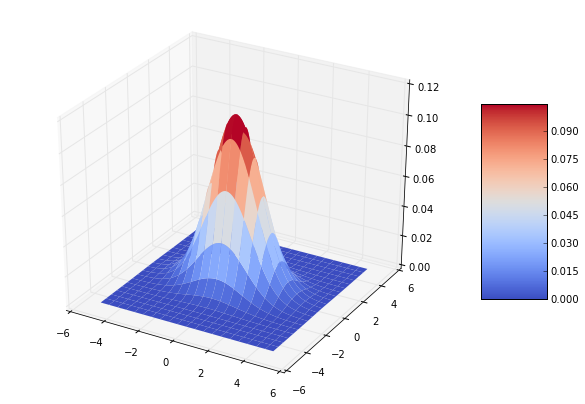

In [10]:
cov = np.array([[2, 0], [0, 1]]) # Identity matrix
mu = np.array([0,0])

minVal   = -5
maxVal   = 5
stepSize = 0.05
xAxisVal = np.arange(minVal, maxVal, stepSize)
yAxisVal = np.arange(minVal, maxVal, stepSize)
xx, yy = np.meshgrid(xAxisVal, yAxisVal)

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, normal_dist_2d(xx,yy,mu,cov), cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=3)
plt.show()